# Logistic Regression on Loan Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Education']=le.fit_transform(df['Education'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 55.3+ KB


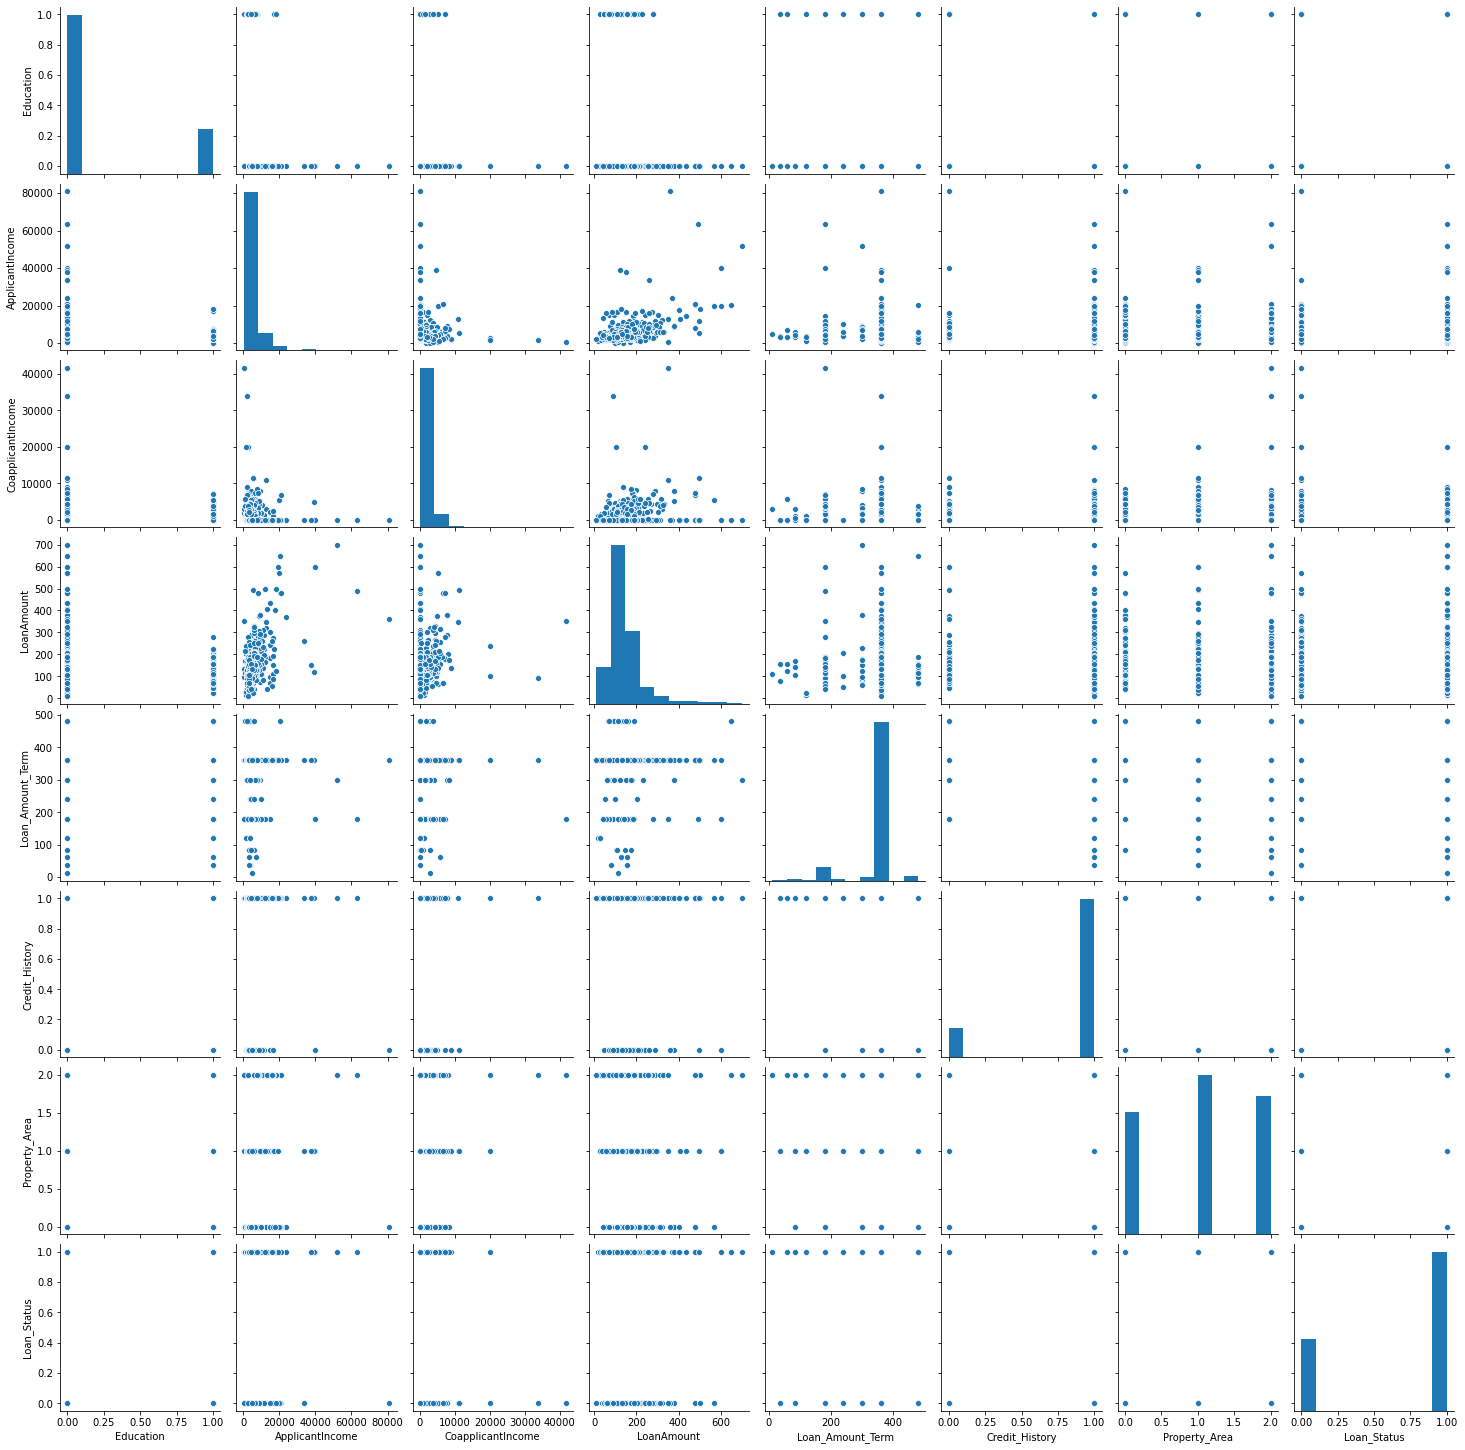

In [8]:
sns.pairplot(df)

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,2,1


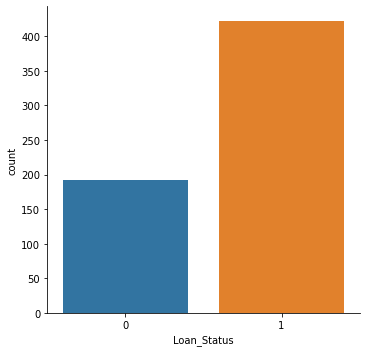

In [10]:
sns.catplot(data=df,x="Loan_Status",kind="count")

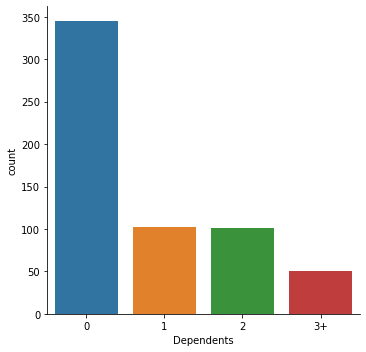

In [11]:
sns.catplot(data=df,x="Dependents",kind="count")

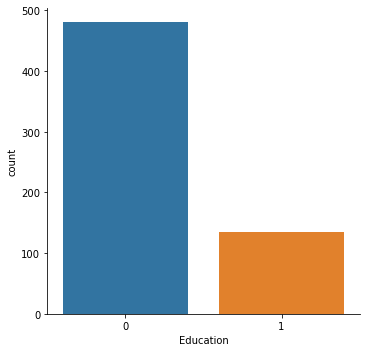

In [12]:
sns.catplot(data=df,x="Education",kind="count")

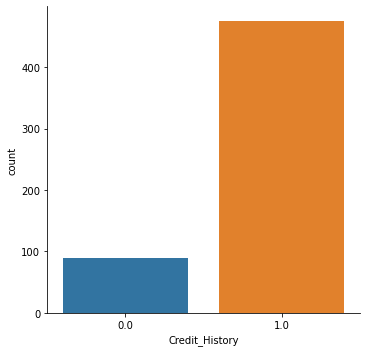

In [13]:
sns.catplot(data=df,x="Credit_History",kind="count")   # imbalance data

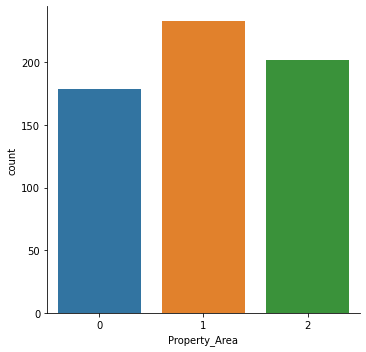

In [14]:
sns.catplot(data=df,x="Property_Area",kind="count")

In [15]:
df.corr()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,1.000000,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
ApplicantIncome,-0.140760,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,-0.062290,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,-0.171133,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.078784,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,-0.081822,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678
Property_Area,-0.065243,-0.009500,0.010522,-0.045792,-0.078748,-0.001969,1.000000,0.032112
Loan_Status,-0.085884,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,0.032112,1.000000


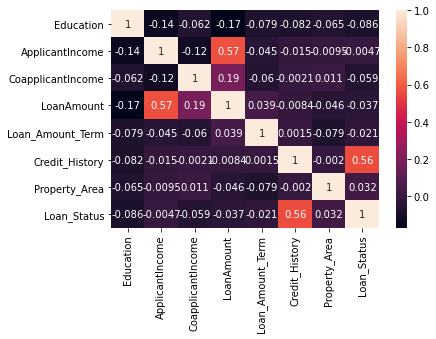

In [16]:
sns.heatmap(df.corr(),annot=True)
# 1 positive
# 0 not Corr
# -1 neagative 

In [17]:
x=df.iloc[:,6:10]
y=df.iloc[:,-1]

In [18]:
x.fillna(x.mean(), inplace=True)

In [36]:
from sklearn.preprocessing import MinMaxScaler
a = x.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(a)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [38]:
ypred=model.predict(xtest)

In [39]:
ypred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
acc=accuracy_score(ytest,ypred)
acc

0.4715447154471545

In [42]:
cm=confusion_matrix(ytest,ypred)
cm

array([[21, 21],
       [44, 37]], dtype=int64)

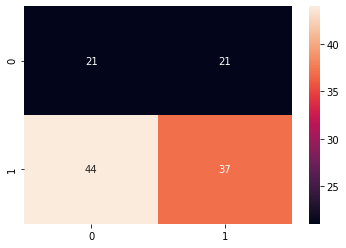

In [43]:
sns.heatmap(cm,annot=True)

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.32      0.50      0.39        42
           1       0.64      0.46      0.53        81

    accuracy                           0.47       123
   macro avg       0.48      0.48      0.46       123
weighted avg       0.53      0.47      0.48       123



In [45]:
from sklearn import metrics
ypred_prob=model.predict_proba(xtest)
ypred_prob

array([[0.49668018, 0.50331982],
       [0.50225399, 0.49774601],
       [0.48714282, 0.51285718],
       [0.50333286, 0.49666714],
       [0.52535288, 0.47464712],
       [0.49638613, 0.50361387],
       [0.49979882, 0.50020118],
       [0.48399292, 0.51600708],
       [0.48522053, 0.51477947],
       [0.50001156, 0.49998844],
       [0.4914331 , 0.5085669 ],
       [0.49470073, 0.50529927],
       [0.47979249, 0.52020751],
       [0.51881815, 0.48118185],
       [0.4953264 , 0.5046736 ],
       [0.49087903, 0.50912097],
       [0.48799999, 0.51200001],
       [0.48698845, 0.51301155],
       [0.50606842, 0.49393158],
       [0.50384001, 0.49615999],
       [0.51919586, 0.48080414],
       [0.4884248 , 0.5115752 ],
       [0.50386813, 0.49613187],
       [0.5005126 , 0.4994874 ],
       [0.48733039, 0.51266961],
       [0.50280603, 0.49719397],
       [0.48612605, 0.51387395],
       [0.50580623, 0.49419377],
       [0.50830183, 0.49169817],
       [0.5009927 , 0.4990073 ],
       [0.

In [46]:
ypred_prob=model.predict_proba(xtest)[:,1]
ypred_prob
fpr,tpr,_=metrics.roc_curve(ytest,ypred_prob)

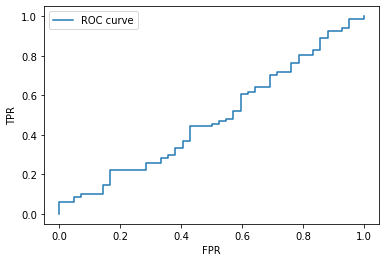

In [47]:
auc=metrics.roc_auc_score(ytest,ypred_prob)
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [48]:
auc

0.48383303938859495